# Tugas 1
1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.
1. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?
1. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

## 1. Import Libraries dan Load Dataset

In [1]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('voice.csv')

# Tampilkan informasi dataset
print("Shape dataset:", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDistribusi label:")
print(df['label'].value_counts())

Shape dataset: (3168, 21)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   fl

## 2. Exploratory Data Analysis (EDA)

In [2]:
# Cek missing values
print("Missing values:")
print(df.isnull().sum())

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())

# Cek duplikasi
print(f"\nJumlah data duplikat: {df.duplicated().sum()}")

Missing values:
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Statistik deskriptif:
          meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     

## 3. Persiapan Data

In [3]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('label', axis=1)
y = df['label']

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("\nNama fitur:")
print(X.columns.tolist())

Shape X: (3168, 20)
Shape y: (3168,)

Nama fitur:
['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


In [4]:
# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (2534, 20)
Shape X_test: (634, 20)
Shape y_train: (2534,)
Shape y_test: (634,)


In [5]:
# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data telah di-standarisasi")
print("Mean X_train_scaled:", np.mean(X_train_scaled, axis=0)[:5])  # Tampilkan 5 fitur pertama
print("Std X_train_scaled:", np.std(X_train_scaled, axis=0)[:5])    # Tampilkan 5 fitur pertama

Data telah di-standarisasi
Mean X_train_scaled: [-9.32341988e-17 -1.31789694e-16  1.26181622e-17  4.20605408e-18
 -1.41603821e-15]
Std X_train_scaled: [1. 1. 1. 1. 1.]


## 4. Membuat Model kNN

In [6]:
# Membuat model kNN dengan k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)

# Training model
knn.fit(X_train_scaled, y_train)

# Prediksi
y_pred = knn.predict(X_test_scaled)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model kNN (k=5) dengan semua fitur: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi model kNN (k=5) dengan semua fitur: 0.9763

Classification Report:
              precision    recall  f1-score   support

      female       0.99      0.97      0.98       317
        male       0.97      0.99      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



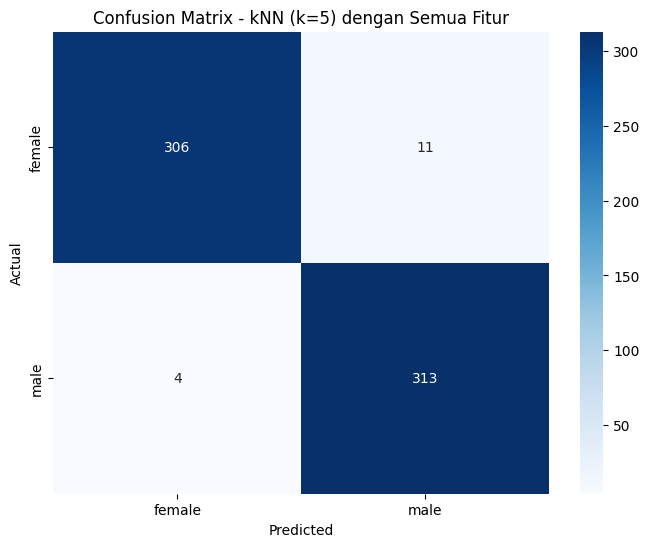

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['female', 'male'], 
            yticklabels=['female', 'male'])
plt.title('Confusion Matrix - kNN (k=5) dengan Semua Fitur')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 5. Mencari Nilai k yang Optimal

In [8]:
# Testing berbagai nilai k
k_values = range(1, 31)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Akurasi training
    train_pred = knn.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)
    
    # Akurasi testing
    test_pred = knn.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)
    
    print(f"k={k:2d} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

k= 1 | Train Accuracy: 1.0000 | Test Accuracy: 0.9811
k= 2 | Train Accuracy: 0.9878 | Test Accuracy: 0.9763
k= 3 | Train Accuracy: 0.9862 | Test Accuracy: 0.9763
k= 4 | Train Accuracy: 0.9866 | Test Accuracy: 0.9779
k= 5 | Train Accuracy: 0.9830 | Test Accuracy: 0.9763
k= 6 | Train Accuracy: 0.9815 | Test Accuracy: 0.9795
k= 7 | Train Accuracy: 0.9779 | Test Accuracy: 0.9732
k= 8 | Train Accuracy: 0.9783 | Test Accuracy: 0.9732
k= 9 | Train Accuracy: 0.9736 | Test Accuracy: 0.9748
k=10 | Train Accuracy: 0.9743 | Test Accuracy: 0.9763
k=11 | Train Accuracy: 0.9712 | Test Accuracy: 0.9669
k=12 | Train Accuracy: 0.9708 | Test Accuracy: 0.9669
k=13 | Train Accuracy: 0.9712 | Test Accuracy: 0.9637
k=14 | Train Accuracy: 0.9712 | Test Accuracy: 0.9637
k=15 | Train Accuracy: 0.9688 | Test Accuracy: 0.9606
k=16 | Train Accuracy: 0.9672 | Test Accuracy: 0.9621
k=17 | Train Accuracy: 0.9665 | Test Accuracy: 0.9621
k=18 | Train Accuracy: 0.9649 | Test Accuracy: 0.9621
k=19 | Train Accuracy: 0.964

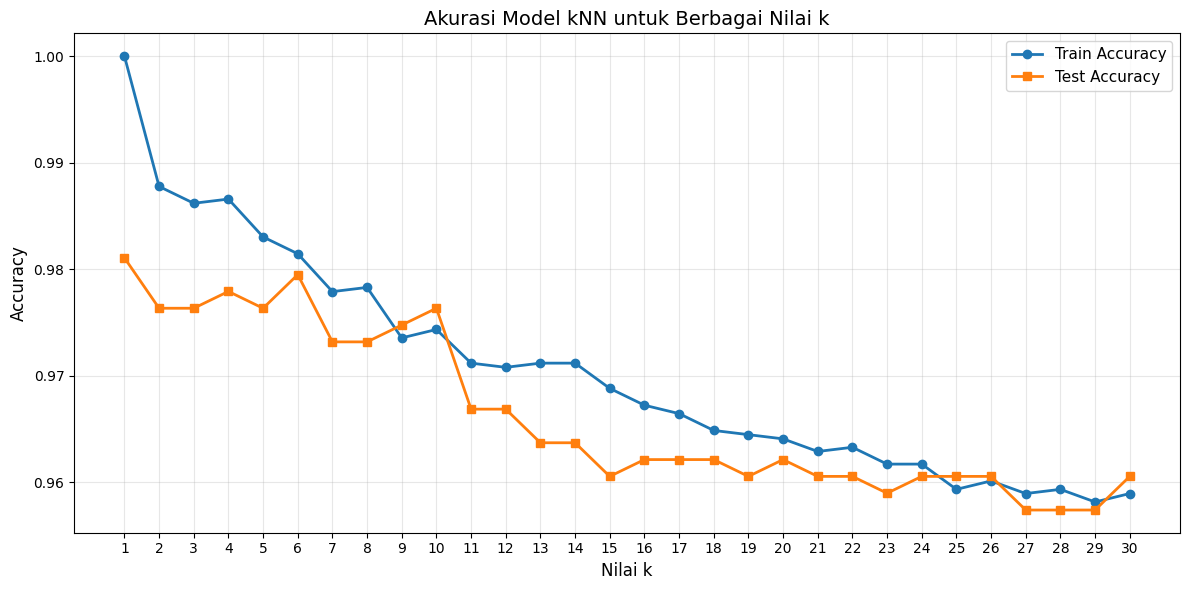


Nilai k terbaik: 1
Akurasi terbaik: 0.9811


In [9]:
# Plot hasil pencarian k optimal
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy', linewidth=2)
plt.xlabel('Nilai k', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Akurasi Model kNN untuk Berbagai Nilai k', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

# Mencari k terbaik
best_k = k_values[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)
print(f"\nNilai k terbaik: {best_k}")
print(f"Akurasi terbaik: {best_accuracy:.4f}")

## 6. Model Final dengan k Optimal

Model kNN Final (k=1)
Akurasi: 0.9811

Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.98      0.98       317
        male       0.98      0.98      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



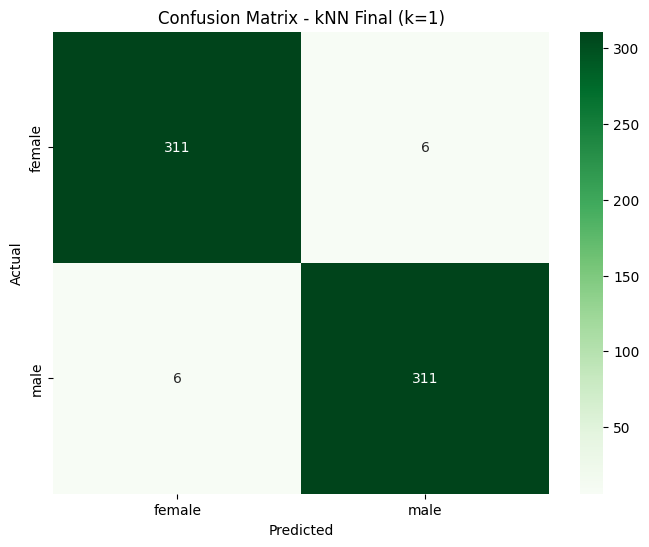

In [10]:
# Training model dengan k optimal
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# Prediksi
y_pred_final = knn_final.predict(X_test_scaled)

# Evaluasi
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Model kNN Final (k={best_k})")
print(f"Akurasi: {accuracy_final:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['female', 'male'], 
            yticklabels=['female', 'male'])
plt.title(f'Confusion Matrix - kNN Final (k={best_k})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()